# Определение перспективного тарифа для телеком компании

## Описание проекта

Исследование компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В моём распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год.

### Описание тарифов

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
   - Сообщение — 3 рубля.
   - 1 Гб интернет-трафика — 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - Минута разговора — 1 рубль;
   - Сообщение — 1 рубль;
   - 1 Гб интернет-трафика: 150 рублей.

**Цель исследования** - сделать предварительный анализ тарифов на небольшой выборке клиентов. На основе данных за 2018 год по 500-ам пользователям «Мегалайна» необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Ход исследования** - данные по пользователям разных тарифов будут получены из архива компании. О качестве данных заранее ничего неизвестно, поэтому перед тем, как приступить к основной части проекта, понадобится получить первые впечатления о данных, после чего проверить их на качество и наличие в них различных ошибок, пропусков и аномалий, если что-то подобное присутствует, на этапе предобработки необходимо будет исправить самые критичные ошибки и привести датафрейм к нормальному, рабочему состоянию. 
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Основная часть.
 4. Проверка гипотез. 
 5. Итоговый вывод

## 1. Обзор данных

In [1]:
# Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
plt.style.use('seaborn')

In [2]:
# Чтение файла на локальном юпитере
try:
    df_calls = pd.read_csv('Данные проекта 4 "calls.csv"')
    df_internet = pd.read_csv('Данные проекта 4 "internet.csv"')
    df_messages = pd.read_csv('Данные проекта 4 "messages.csv"')
    df_tariffs = pd.read_csv('Данные проекта 4 "tariffs.csv"')
    df_users = pd.read_csv('Данные проекта 4 "users.csv"')
# Чтение файла на юпитере тренажёра 
except:
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')

In [3]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_calls['duration'].value_counts()

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

**Вывод по таблице `df_calls`**

1. В столбце `call_date` - дата звонка, предстален тип данных `object`. Так как в этом столбце дата, то тип необходимо будет исправить на `datetime64`.
2. В столбце `duration` большинство звонков длились 0 секунд. Я считаю, что это не ошибка, а пропущенные вызовы, поэтому удалять эти значения не нужно. 

In [6]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Вывод по таблице `df_internet`**

В столбце `session_date` - дата интернет-сессии, предстален тип данных `object`. Так как в этом столбце тоже дата, то тип необходимо будет исправить на `datetime64`. Также, обнаружен лишний столбец - `Unnamed: 0`, который в последующем необходимо будет удалить. 

In [8]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
df_messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Вывод по таблице `df_messages`**

В столбце `message_date` - дата сообщения, предстален тип данных `object`. Так как в этом столбце опять же дата, то тип необходимо будет исправить на `datetime64`.

In [10]:
# Информация о тарифах
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод по таблице `df_tariffs`**

В данной таблице ошибок в данных не выявлено

In [12]:
# Информация о пользователях
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
df_users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод по таблице `df_users`**

Изучая первое впечатление о данных, можно увидеть несколько ошибок в данных:
1. Существенное количество пропусков в столбце `churn_date` - дата прекращения пользования тарифом, их необходимо будет проанализировать. 
2. В том же столбце - `churn_date`, а также в столбце `reg_date` - дата подключения тарифа, тип данных `object`. Тип данных в этих столбцах также необходимо будет исправить на `datetime64`.

Согласно документации к данным:

Таблица `users` — информация о пользователях:
* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя; 
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tarif` — название тарифного плана

Таблица `calls` — информация о звонках:
* `id` — уникальный номер звонка;
* `call_date` — дата звонка; 
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок;

Таблица `messages` — информация о сообщениях:
* `id` — уникальный номер звонка;
* `message_date` — дата сообщения; 
* `user_id` — идентификатор пользователя, отправившего сообщение;

Таблица `internet` — информация об интернет-сессиях:
* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах); 
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя;

Таблица `tariffs` — информация о тарифах:
* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях; 
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта);

**Вывод по 1-ому разделу**

1. Изучив первое впечатление о данных, замечу, что подавляющее большинство ошибок прослеживается в том, что столбцы имеют неправильный тип данных, который в дальнейшем приведёт к ошибке, поэтому в следующем разделе необходимо будет этот момент исправить. 
2. Что касается пропусков, то их совсем немного, если говорить относительно всех таблиц. Они прослеживаются только в таблице `df_users` в столбце `churn_date`, поэтому их появление следует изучить.
3. В таблице `df_internet` выявлен лишний столбец `Unnamed: 0`: он дублирует индексы, следовательно, его надо будет удалить, чтобы в дальнейшей работе не мешался. 

## 2. Предобработка данных

На данном этапе будут устранены выявленные проблемы в данных, а также будут обработаны значения в столбцах с целью дальнейшего удобства работы с ними. 

In [14]:
# Изучение пропусков в таблице df_users
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

**Вывод по таблице `df_users`**

Можно предположить, что пропуски связаны с тем, что на момент выгрузки данных, тариф ещё действовал, поэтому пропущенные значения оставим как есть. Стоит также заметить, что таких пропусков много, относительно данной таблицы. 

In [15]:
# Обработка типа данных в столбце call_date
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
# Обработка типа данных в столбце session_date
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
# Обработка типа данных в столбце message_date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
# Обработка типа данных в столбце churn_date
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
# Обработка типа данных в столбце reg_date
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

In [16]:
# Проверяем как отработал метод по змене типа данных на одной таблице
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [17]:
# Округление значений в столбце duration
df_calls['duration'] = np.ceil(df_calls['duration'])
# df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [18]:
# Переводим мегабайты в гигабайты
df_internet['mb_used'] = df_internet['mb_used'] / 1024
# Изменяем название столбца
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})
# Удаляем ненужный столбец Unnamed: 0
df_internet.pop('Unnamed: 0')
df_internet.head()

,id,gb_used,session_date,user_id
0,1000_0,0.110303,2018-11-25,1000
1,1000_1,1.028135,2018-09-07,1000
2,1000_2,1.169199,2018-06-25,1000
3,1000_3,0.537373,2018-08-22,1000
4,1000_4,0.295469,2018-09-24,1000


In [19]:
# Изменяем название столбца в таблице df_tariffs
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})

In [20]:
# Создаём во всех таблицах новый столбец с месяцем для удобства дальнейшего исследования
df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_users['month'] = df_users['reg_date'].dt.month

In [21]:
# Группируем данные в каждой таблице
pivot_calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
pivot_internet = df_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum')
# Округление значений в столбце gb_used до целого
df_internet['gb_used'] = df_internet['gb_used'].apply(np.ceil)
pivot_messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

In [22]:
# Переименование названия столбцов
pivot_calls.columns = ['sum_calls', 'count_calls']
pivot_internet.columns = ['sum_gb_used']
pivot_messages.columns = ['count_messages']

**Вывод по 2-ому разделу**

1. В процессе предобработки данных в нескольких столбцах были исправлены типы данных для того, чтобы с этими столбцами можно было дальше корректно работать.
2. Были приведены аргументы в пользу того, чтобы оставить пропуски, которые были найдены в таблице.
3. Были округлены значения в столбце `duration`, а также в столбце `mb_used` были переведены мегабайты в гигабайты и полученные значения в столбце также были округлены до целого верхнего числа для точности представления данных. 
4. Для удобства восприятия данных были изменены некоторые названия столбцов.
5. В трёх таблицах был создан столбец с месяцами для дальнейшей работы с ними
6. Был выявлен и удалён лишний столбец `Unnamed: 0` в таблице `df_internet`
7. Были сгруппированы данные по каждой таблице для удобства дальнейшей работы с ними

## 3. Основная часть

### 3.1. Соединение таблиц

In [23]:
# Объединяем таблицу с информацией о звонках с таблицей с информацией об интернете по общим столбцам
pivot_1 = pivot_calls.merge(pivot_internet, on=['user_id', 'month'], how='outer')
pivot_1.head()

sum_calls  count_calls  sum_gb_used
user_id month                                     
1000    5          159.0         22.0     2.200674
        6          172.0         43.0    22.689229
        7          340.0         47.0    13.675430
        8          408.0         52.0    13.726494
        9          466.0         58.0    14.227451

In [24]:
# Объединяем предыдущую таблицу с таблицей с информацией о сообщениях по общим столбцам
pivot_2 = pivot_1.merge(pivot_messages, on=['user_id', 'month'], how='outer')
pivot_2.head()

sum_calls  count_calls  sum_gb_used  count_messages
user_id month                                                     
1000    5          159.0         22.0     2.200674            22.0
        6          172.0         43.0    22.689229            60.0
        7          340.0         47.0    13.675430            75.0
        8          408.0         52.0    13.726494            81.0
        9          466.0         58.0    14.227451            57.0

In [25]:
# Объединяем предыдущую таблицу со всей информацией: о звонках, сообщениях и интернете с таблицей с информацией о пользователях
pivot_3 = pivot_2.merge(df_users, on='user_id', how='outer')
pivot_3.head()

,user_id,sum_calls,count_calls,sum_gb_used,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,159.0,22.0,2.200674,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000,172.0,43.0,22.689229,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000,340.0,47.0,13.675430,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000,408.0,52.0,13.726494,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000,466.0,58.0,14.227451,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5


In [26]:
# К общей таблице присоединяем таблицу с информацией о тарифах
total_pivot = pivot_3.merge(df_tariffs, on='tariff', how='outer')

In [27]:
# Для корректного предоставления информации переведём мегабайты в гигабайты в столбце mb_per_month_included
total_pivot['mb_per_month_included'] = total_pivot['mb_per_month_included'] / 1024
# Округляем значения в столбце mb_per_month_included до целого числа
total_pivot['mb_per_month_included'] = total_pivot['mb_per_month_included'].apply(np.ceil)
# Изменяем название столбца
total_pivot = total_pivot.rename(columns={'mb_per_month_included': 'gb_per_month_included'})
total_pivot.head()

,user_id,sum_calls,count_calls,sum_gb_used,count_messages,age,churn_date,city,first_name,last_name,reg_date,tariff,month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,159.0,22.0,2.200674,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
1,1000,172.0,43.0,22.689229,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
2,1000,340.0,47.0,13.675430,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
3,1000,408.0,52.0,13.726494,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1
4,1000,466.0,58.0,14.227451,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1000,30.0,3000,1950,150,1,1


In [28]:
# Получение общей информации об итоговой таблице
total_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   sum_calls              3174 non-null   float64       
 2   count_calls            3174 non-null   float64       
 3   sum_gb_used            3203 non-null   float64       
 4   count_messages         2717 non-null   float64       
 5   age                    3216 non-null   int64         
 6   churn_date             189 non-null    datetime64[ns]
 7   city                   3216 non-null   object        
 8   first_name             3216 non-null   object        
 9   last_name              3216 non-null   object        
 10  reg_date               3216 non-null   datetime64[ns]
 11  tariff                 3216 non-null   object        
 12  month                  3216 non-null   int64         
 13  mes

**Вывод по таблице `total_pivot`**

Данная таблица явялется итоговой после всех объединений

### 3.2. Нахождение выручки по пользователям

In [29]:
# Нахождение помесячной выручки с каждого пользователя
def user_revenue (revenue):
    tariff = revenue['tariff']
    
    over_min = revenue['sum_calls'] - revenue['minutes_included']
    over_gb = revenue['sum_gb_used'] - revenue['gb_per_month_included']
    over_sms = revenue['count_messages'] - revenue['messages_included'] 
    
    if over_min < 0:
        rub_min = 0 
    else:
        rub_min = over_min * revenue['rub_per_minute']
        
    if over_gb < 0:
        rub_gb = 0 
    else:
        rub_gb = over_gb * revenue['rub_per_gb'] 
         
    if over_sms < 0:
        rub_sms = 0 
    else:
        rub_sms = over_sms * revenue['rub_per_message']
        
    earnings = rub_min + rub_gb + rub_sms + revenue['rub_monthly_fee']
    return earnings

In [30]:
# Создаём столбец с выручкой по пользователям и проверяем работоспособность функции
total_pivot['revenue'] = total_pivot.apply(user_revenue, axis=1)
total_pivot.head()

,user_id,sum_calls,count_calls,sum_gb_used,count_messages,age,churn_date,city,first_name,last_name,...,tariff,month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,159.0,22.0,2.200674,22.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,172.0,43.0,22.689229,60.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,340.0,47.0,13.675430,75.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,408.0,52.0,13.726494,81.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,466.0,58.0,14.227451,57.0,52,NaT,Краснодар,Рафаил,Верещагин,...,ultra,5,1000,30.0,3000,1950,150,1,1,1950.0


**Вывод**

После того, как данные обработали: исправили различные ошибки, соединили все таблицы воедино, была получена выручка по пользователю для дальнейшего анализа.

### 3.3. Изучение поведения пользователей

In [31]:
# Функция по построению барплота для изучения поведения пользователей
def plotting_bar(tariff_1, tariff_2):
# Собираем словарь с названиями
    parametrs = ['sum_calls', 'count_messages', 'sum_gb_used']
    labels = [
    ['Длительность звонков, мин', f'Суммарная длительность разговоров за каждый месяц по тарифам {tariff_1} и {tariff_2}'],
    ['Количество сообщений, шт', f'Суммарное количество сообщений за каждый месяц по тарифам {tariff_1} и {tariff_2}'],
    ['Количество гигабайт', f'Суммарный объём интернет-трафика за каждый месяц по тарифам {tariff_1} и {tariff_2}']
             ] # список списков, в каждом вложенном списке первое значение - ось У, второе - заголовок
    labels_dict = dict(zip(parametrs, labels))
    # Далее выбирается срез таблицы по параметру
    df_tariff_1 = total_pivot[total_pivot['tariff'] == tariff_1]
    df_tariff_2 = total_pivot[total_pivot['tariff'] == tariff_2]
    # Начинается цикл по списку параметров ['sum_calls', 'count_messages', 'sum_gb_used']
    for f in parametrs:
        # plt.figure(figsize=(12, 5))
        plt.subplots(figsize=(15, 5))
        df_tariff_1.groupby('month')[f].sum().plot(kind='bar', colormap = 'Set3', 
                                                   label=tariff_1, grid=True,
                                                   position = 0, width=0.2)
        df_tariff_2.groupby('month')[f].sum().plot(kind='bar', colormap = 'tab20c', grid=True,
                                                   label=tariff_2, 
                                                   position = 1, width=0.2)
        plt.xticks(rotation=360)
        plt.xlabel('Номер месяца')
        plt.legend()
        # В словаре по названию из переменной f находим значение для оси Y
        plt.ylabel(labels_dict[f][0])
        # В словаре по названию из переменной f находим значение для заголовка
        plt.title(labels_dict[f][1])

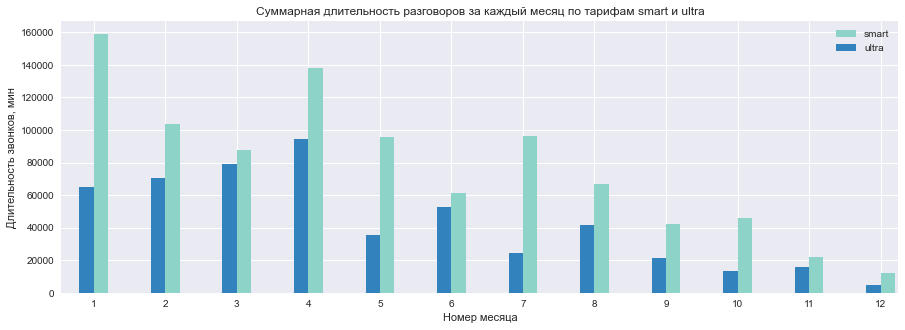

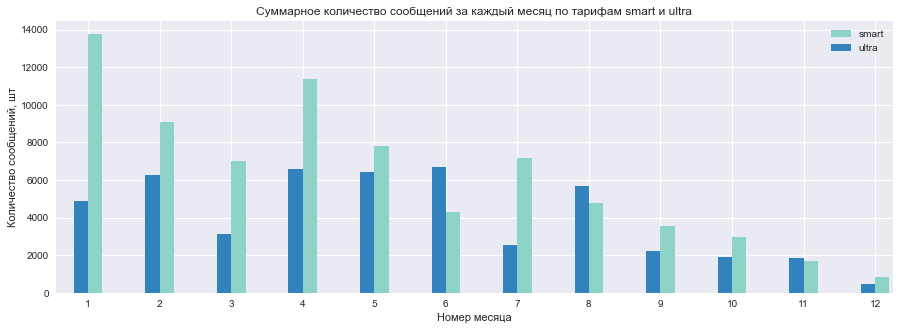

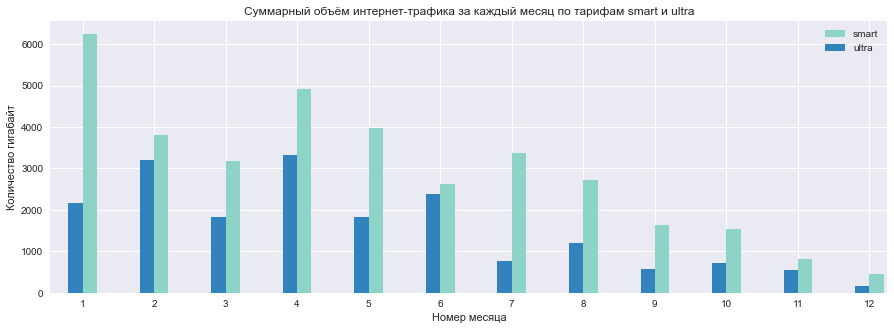

In [32]:
plotting_bar('smart', 'ultra')

**Вывод по поведению пользователей**

1. Изучая длительность разговоров двух тарифов, можно заметить, что по тарифу Смарт пользователи больше всего разговаривают в 1 и 4 месяцах. А также наблюдается тенденция к спаду: чем дальше от 1 месяца, тем длительность разговоров меньше. Что касается тарифа Ультра, то здесь картина немного другая: большинство пользователей больше всего разговаривают в первые четыре месяца. Однако тенденция снижения длительности разговора с увеличением месяца также прослеживается. 
2. Говоря про количество отправленных сообщений по тарифу Смарт, то здесь картина идентична длительности разговоров: в первом и четвёртом месяцах отправлено наибольшее количество сообщений, а также тенденция на снижение отправленных сообщений к 12 месяцу тоже прослеживается. Если говорить про сообщения по тарифу Ультра, то здесь пользователи переписываются гораздо чаще и охотнее: больше всего пользователи отправляют сообщения в 1-2, 4-6, 8 месяцах. К концу года по данному тарифу люди также переписываются совсем не охотно. 
3. Изучая объём использованного интернет-трафика по тарифу Смарт, то здесь картина такая же, как и в прошлые разы: больше всего интернета тратится в 1 и 4 месяцах, а также видно, что к концу года прослеживается постепенное снижение использования интернета. Если говорить про тариф Ультра, то здесь можно увидеть, что первые 6 месяцев люди используют интернет намного чаще, чем последующие полгода: начиная с 7 месяца, наблюдается уже резкий спад по использованию интернета.

### 3.4. Изучение распределения пользователей

In [33]:
# Функция по построению графиков для изучения распределения пользователей
def plotting_hist(tariff_1, tariff_2):
# Собираем словарь с названиями
    parametrs = ['sum_calls', 'count_messages', 'sum_gb_used']
    labels = [
    ['Длительность звонков, мин', f'Распределение длительности разговоров по тарифам {tariff_1} и {tariff_2}'],
    ['Количество сообщений, шт', f'Распределение количества сообщений по тарифам {tariff_1} и {tariff_2}'],
    ['Количество гигабайт', f'Распределение объёма интернет-трафика по тарифам {tariff_1} и {tariff_2}']
             ] # список списков, в каждом вложенном списке первое значение - ось У, второе - заголовок
    labels_dict = dict(zip(parametrs, labels))
    # Далее выбирается срез таблицы по параметру
    df_tariff_1 = total_pivot[total_pivot['tariff'] == tariff_1]
    df_tariff_2 = total_pivot[total_pivot['tariff'] == tariff_2]
    # Начинается цикл по списку параметров ['sum_calls', 'count_messages', 'sum_gb_used']
    for f in parametrs:
        plt.subplots(figsize=(15, 5))
        df_tariff_1[f].plot(kind='hist', colormap = 'Set3', 
                            label=tariff_1, grid=True, bins=50)
        df_tariff_2[f].plot(kind='hist', colormap = 'tab20c', grid=True,
                            label=tariff_2, bins=50)
        plt.legend()
        plt.xlabel(labels_dict[f][0])
        # В словаре по названию из переменной f находим значение для оси Y
        plt.ylabel('Количество пользователей, чел.')
        # В словаре по названию из переменной f находим значение для заголовка
        plt.title(labels_dict[f][1])

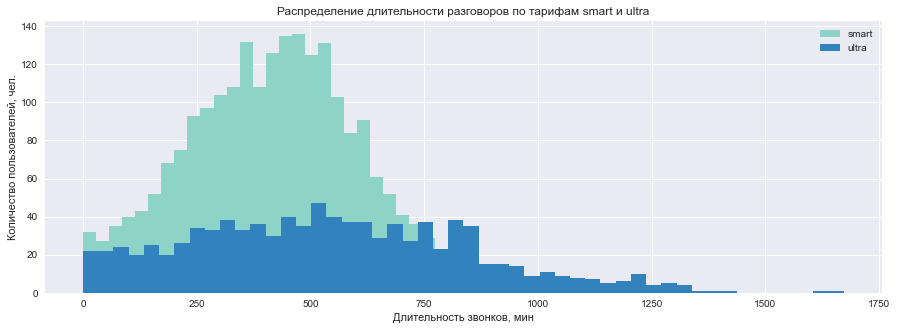

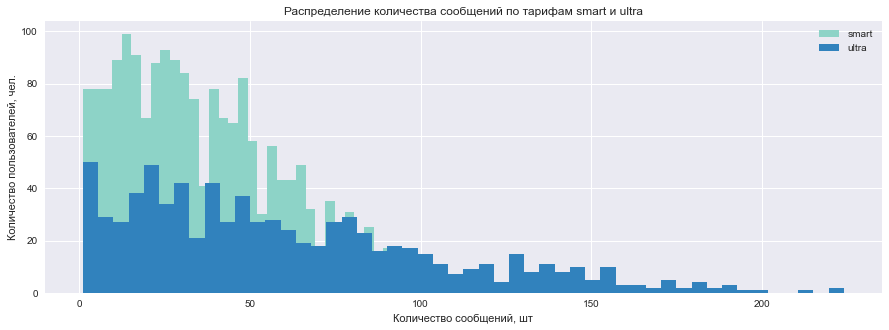

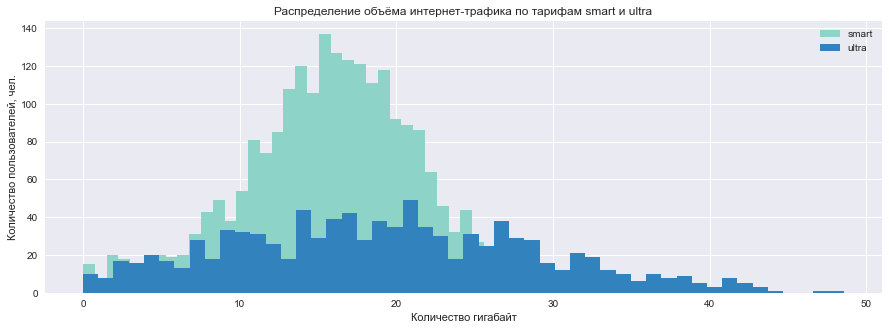

In [34]:
plotting_hist('smart', 'ultra')

**Вывод по распределениям**

1. Если говорить про распределение длительности разговоров по тарифу Смарт, то здесь можно заметить, что больше всего пользователями тратится около 500 минут. По тарифу Ультра картина немного другая: распределение по длительности шире, основной купол больше, чем у предыдущего тарифа и наибольшее количество потраченных минут равно примерно 550. Однако и там, и там распределение нормальное. 
2. Говоря про количество сообщений, то у обоих тарифов прослеживается биномиальное распределение. Только у тарифа Смарт наибольшее количество сообщений находится в диапазоне примерно от 0 до 30. А у тарифа Ультра - от 0 до 20, то есть практически не общаются по смс. 
3. Изучая распределение потраченного интернет-трафика, то по тарифу Смарт наибольшее количество использованного интернета равно примерно 17. Что касается потраченного интернета по тарифу Ультра, то здесь распределение намного шире, основной купол также больше и наибольшее количество потраченного трафика находится в диапазоне примерно от 15 до 23. 

### 3.5. Описательная статистика тарифов

In [35]:
# Рассчёт среднего значения для каждого тарифа
total_pivot.pivot_table(index='tariff', values=['sum_calls', 'count_messages', 'sum_gb_used'])

,count_messages,sum_calls,sum_gb_used
tariff,,,
smart,38.716441,419.062978,15.835607
ultra,61.161006,545.451104,19.207505


**Вывод**

Изучая показатели использования сообщений, потраченных минут разговора и интернета, видно, что в среднем по тарифу Смарт эти показатели ниже, чем по тарифу Ультра, то есть вторым тарифом пользуются чаще. 

In [36]:
# Функция для нахождения описательной статистики определённого тарифа
def descriptive_statistics(parametr):
    tariff_table = total_pivot[total_pivot['tariff'] == parametr]
    table_var = ['sum_calls', 'count_messages', 'sum_gb_used']
    print(f'Описательная статистика тарифа {parametr}:')
    print('--------------------------------')
    for value in table_var:
        # Нахождение дисперсии и стандартного отклонения 
        print(f'Дисперсия {value} равна {np.var(tariff_table[value])}')
        print(f'Стандартное отклонение {value} равно {np.std(tariff_table[value])}')
        if value != 'sum_gb_used':
            print('')

In [37]:
descriptive_statistics('smart')

Описательная статистика тарифа smart:
--------------------------------
Дисперсия sum_calls равна 35828.06530953033
Стандартное отклонение sum_calls равно 189.2830296395594

Дисперсия count_messages равна 717.220843110227
Стандартное отклонение count_messages равно 26.780979129042816

Дисперсия sum_gb_used равна 32.75349598018425
Стандартное отклонение sum_gb_used равно 5.723067008185755


In [38]:
descriptive_statistics('ultra')

Описательная статистика тарифа ultra:
--------------------------------
Дисперсия sum_calls равна 94104.36117385984
Стандартное отклонение sum_calls равно 306.76434143143143

Дисперсия count_messages равна 2107.0055235156838
Стандартное отклонение count_messages равно 45.90212983637779

Дисперсия sum_gb_used равна 94.1875931958547
Стандартное отклонение sum_gb_used равно 9.705029273312611


**Вывод**

Что касается разброса данных, то:
1. По тарифу "Смарт" ст. отклонение длительности разговора меньше, чем по тарифу "Ультра", следовательно, можем говорить о том, что в данном случае набор данных у тарифа "Смарт" немного надёжнее.
2. По тарифу "Смарт" ст. отклонение количества сообщений меньше, чем по тарифу "Ультра", следовательно, можем говорить о том, что в данном случае набор данных у тарифа "Смарт" немного надёжнее.
3. По тарифу "Смарт" ст. отклонение объёма интернет-трафика примерно равно тарифу "Ультра", следовательно, можем говорить о том, что в данном случае надёжность обоих наборов данных приблизительно равна.

## 4. Проверка гипотез

#### Гипотеза 1.

Сформируем нулевую (H₀) и альтернативную (H₁) гипотезы:
- H₀: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт»
- H₁: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт»

Будет проверяться гипотеза о равенстве средних двух генеральных совокупностей. Так как в данном случае нам неважно в какую сторону будет измнение, наша альтернативная гипотеза будет двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.

In [39]:
# Рассматриваем пользоватлей, которые используют тариф "Смарт"
smart_tariff_table = total_pivot[total_pivot['tariff'] == 'smart']
# Рассматриваем пользоватлей, которые используют тариф "Ультра"
ultra_tariff_table = total_pivot[total_pivot['tariff'] == 'ultra']
# Игнорируем NaN-ы
smart_tariff_table = smart_tariff_table[smart_tariff_table['revenue'].notna()]
ultra_tariff_table = ultra_tariff_table[ultra_tariff_table['revenue'].notna()]

# Используем статистический метод для проверки гипотезы
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(smart_tariff_table['revenue'], ultra_tariff_table['revenue'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.781039527681862e-144
Отвергаем нулевую гипотезу


**Вывод по гипотезе 1**

Средняя выручка пользователей тарифа «Ультра» имеет статзначимые различия со средней выручкой пользователей тарифа «Смарт» при критическом уровне стат значимости в 5%, следовательно, принимаем H₁.

#### Гипотеза 2.

Сформируем нулевую (H₀) и альтернативную (H₁) гипотезы:
- H₀: средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов
- H₁: средняя выручка пользователей из Москвы не равна средней выручки пользователей из других регионов

Будет также проверяться гипотеза о равенстве средних двух генеральных совокупностей. Как и в первой альтернативной гипотезе, нам неважно, в какую сторону будет измнение, следовательно, гипотеза H₁ двусторонняя, потому что есть возможное отклонение и в большую, и в меньшую стороны.

In [40]:
# Создаём датафрейм с пользователями из Москвы
msc_tariff_table = total_pivot[total_pivot['city'] == 'Москва']
# Создаём датафрейм с пользователями из любого города, кроме Москвы
other_cities_tariff_table = total_pivot[total_pivot['city'] != 'Москва']
# Игнорируем NaN-ы
msc_tariff_table = msc_tariff_table[msc_tariff_table['revenue'].notna()]
other_cities_tariff_table = other_cities_tariff_table[other_cities_tariff_table['revenue'].notna()]

# Используем статистический метод для проверки гипотезы
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(msc_tariff_table['revenue'], other_cities_tariff_table['revenue'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07716894414825232
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе 2**

Средняя выручка пользователей из Москвы не имеет статистически значимых различий со средней выручкой пользователей из других регионов на критическом уровне статистической значимости в 5%, следовательно, принимаем H₀.

## 5. Итоговый вывод

1. `Поведение пользователей`

   - Анализируя `длительность разговоров пользователей по месяцам` можно заметить, что по тарифу Смарт пользователи больше всего разговаривают в 1 и 4 месяцах. А также наблюдается тенденция к спаду: чем дальше от 1-ого месяца, тем меньше пользователи общаются по телефону. Что касается тарифа Ультра, то здесь картина немного другая: большинство пользователей разговаривают в первые четыре месяца. Однако тенденция снижения длительности разговора с увеличением месяца также прослеживается. 

   - Изучая `общее количество отправленных сообщений по месяцам`, видим, что по тарифу `Смарт`, картина идентична длительности разговоров: в первом и четвёртом месяцах отправлено наибольшее количество сообщений, а также тенденция на снижение отправленных сообщений к 12 месяцу тоже прослеживается. Если говорить про `количество отправленных сообщений` по тарифу `Ультра`, то здесь пользователи переписываются гораздо чаще и охотнее: больше всего пользователи отправляют сообщения в 1-2, 4-6, 8 месяцах. К концу года люди также переписываются совсем не охотно. 

   - Рассматривая `объём использованного интернет-трафика` по тарифу `Смарт`, видим, что картина такая же, как и для предыдущих рассматриваемых параметров: больше всего интернета тратится в 1 и 4 месяцах, а также видно, что к концу года прослеживается постепенное снижение использования интернета. Если говорить про тариф `Ультра`, то здесь можно увидеть, что первые 6 месяцев люди используют интернет намного чаще, чем последующие полгода: начиная с 7 месяца, наблюдается уже резкий спад по использованию интернета.

   
2. `Распределение пользователей`

   - Анализируя распределение `длительности разговоров`  по тарифу `Смарт` можно заметить, что больше всего пользователями тратится около 500 минут. По тарифу Ультра картина немного другая: распределение по длительности шире, основной купол больше, чем у предыдущего тарифа и наибольшее количество потраченных минут равно примерно 550. Однако и там, и там распределение нормальное.
   - Говоря про распределение `количества сообщений`, то у обоих тарифов прослеживается биномиальное распределение. Только у тарифа `Смарт` наибольшее количество сообщений находится в диапазоне примерно от 0 до 30. А у тарифа `Ультра` - от 0 до 20, то есть можно сделать вывод о том, что пользователи практически не общаются по смс. 
   - Изучая распределение `потраченного интернет-трафика`, можно увидеть, что по тарифу `Смарт` наибольшее количество использованного интернета равно примерно 17. Что касается `потраченного интернета` по тарифу `Ультра`, то здесь распределение намного шире, основной купол также больше и наибольшее количество потраченного трафика находится в диапазоне примерно от 15 до 23.
   
   
3. `Описательная статистика тарифов`

Изучая показатели использования сообщений, потраченных минут разговора и интернет-трафика, в среднем, по тарифу `Смарт` эти показатели ниже, чем по тарифу Ультра, следовательно, вторым тарифом пользуются чаще.

4. `Проверка гипотез`

    - Средняя выручка пользователей тарифа «Ультра» имеет статзначимые различия со средней выручкой пользователей тарифа «Смарт» при критическом уровне стат значимости в 5%, следовательно, принимаем H₁.
    - Средняя выручка пользователей из Москвы не имеет статистически значимых различий со средней выручкой пользователей из других регионов на критическом уровне статистической значимости в 5%, следовательно, принимаем H₀.
    
На основании ранее проведённого анализа и выше представленных выводов, можно предположить, что тариф `Ультра` лучше тарифа `Смарт`, так как пользователи им пользуются чаще: больше отправляют сообщений и разговаривают по телефону, а также в большем объёме используют интрнет-трафик.